## Setup

In [17]:
import sys
sys.path.append("../Reproduction/ELDR/Code")
sys.path.append("../Reproduction/scvis/lib/scvis")

In [18]:
%tensorflow_version 1.x

## ELDR Iris

In [19]:
# Chosen using results from Iris-K
epsilon = 0.75
k = 1

input_dim = 4
num_clusters = 3
num_classes = 3

model_file = "../Reproduction/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt"

feature_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
import csv
import json
import numpy as np
import os
import pandas as pd

os.system("rm *.png")

from explain_cs import explain
from load_scvis import load_vae
from metrics import metrics, eval_epsilon
from myplot import plot_polys, plot_groups, plot_metrics, plot_explanation, plot_change
from misc import poly2labels

def load_model(input_dim = input_dim, model_file = model_file):
    return load_vae(input_dim, model_file)


In [20]:
# Load Data & Configuration

x = pd.read_csv("../Reproduction/Iris/Data/X.tsv", sep="\t").values

y = pd.read_csv("../Reproduction/Iris/Data/y.tsv", sep="\t").values


with open("../Reproduction/Iris/vertices.json") as json_file:  
    all_vertices = json.load(json_file)


[Text(133.92000000000002, 181.2, 'X[2] <= 0.246\ngini = 0.667\nsamples = 149\nvalue = [49, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 0.688\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

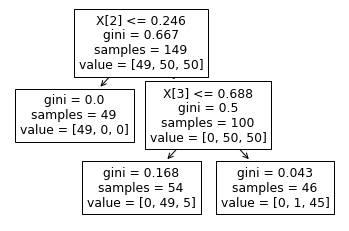

In [ ]:
# Find a simple Decision Tree for this dataset

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 2)

clf = clf.fit(x, y)
tree.plot_tree(clf)  


In [21]:
# Calculate Data Representation

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


In [ ]:
from sklearn.mixture import GaussianMixture

# kmeans = KMeans(n_clusters=num_clusters).fit(rep_np)
gm = GaussianMixture(n_components=num_clusters, covariance_type='diag').fit(data_rep)

In [ ]:
eps = np.mean(np.sqrt(gm.covariances_))
print(eps)

1.2868136760366689


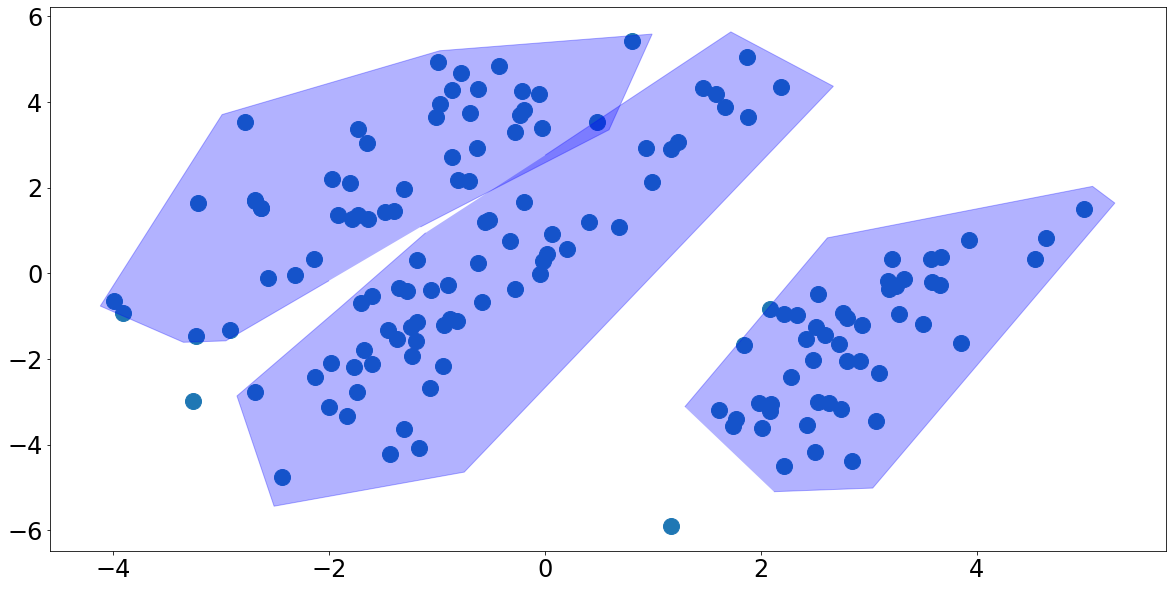

In [22]:
# Visualize the data and the marked clusters

plot_polys(data_rep, all_vertices)

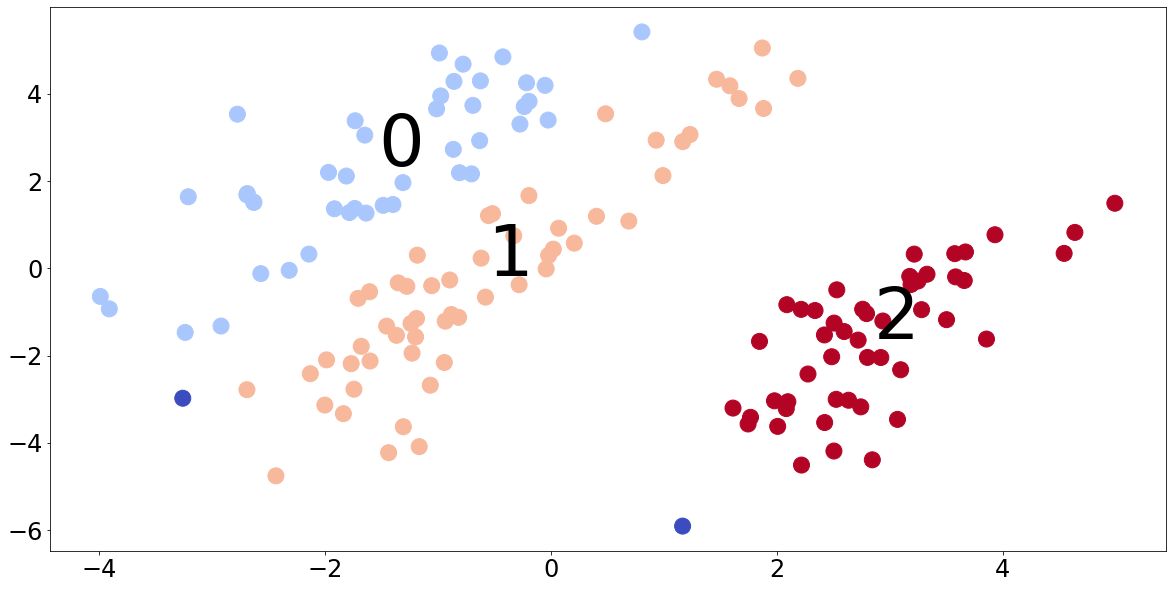

In [126]:
# Visualize the clusters in the learned representation

labels = poly2labels(data_rep, all_vertices)

means, centers, indices = plot_groups(x, data_rep, num_clusters, labels, name = "iris-rep.png")


In [ ]:
eval_epsilon(load_model, x, indices, eps)
# 0.9922480620155039 0.9767441860465116 1.0

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


In [ ]:
eval_epsilon(load_model, x, indices, epsilon)
# 0.9537421557770395 0.9285714285714286 0.9791666666666666

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


In [ ]:
# Inspect the correlation between cluster and class

confusion  = np.zeros((num_clusters, num_classes))
for i in range(y.shape[0]):
    if labels[i] != -1.0:
        confusion[int(labels[i]), int(y[i])] += 1
    
print(confusion)

[[ 0.  5. 38.]
 [ 0. 44. 12.]
 [48.  0.  0.]]


INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


/content/ELDR/Code/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


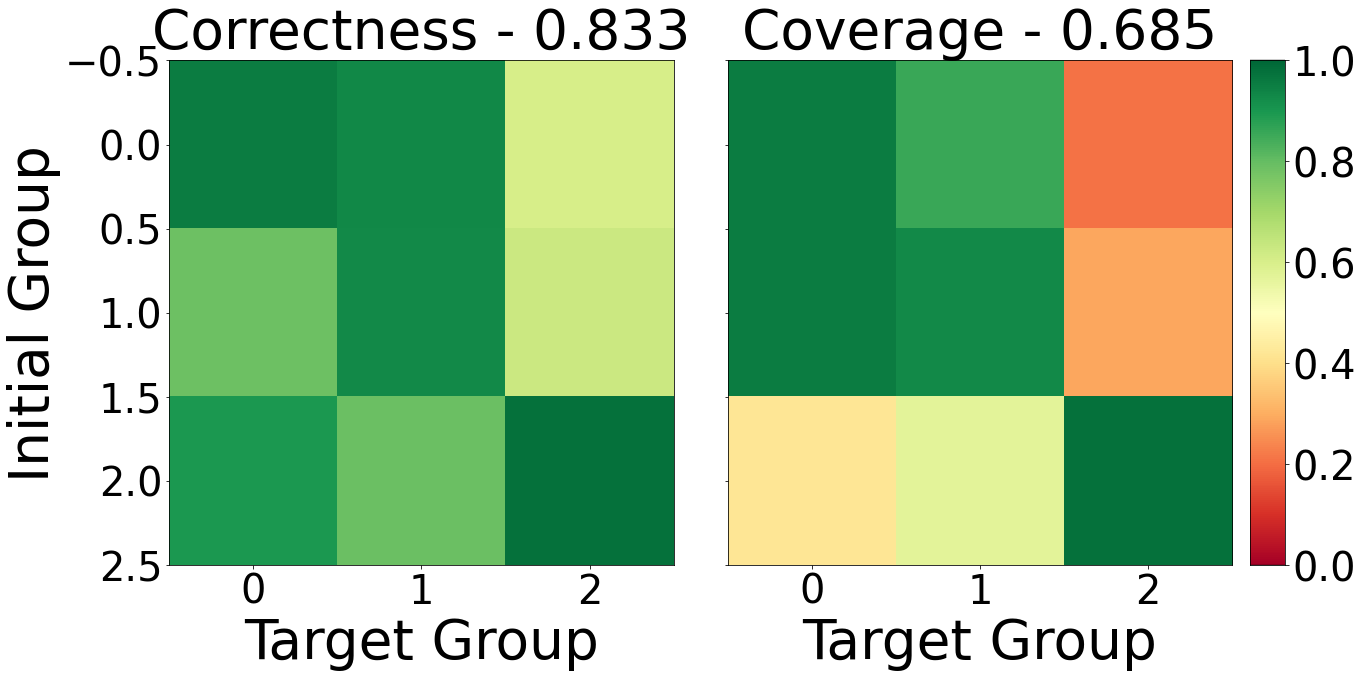

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


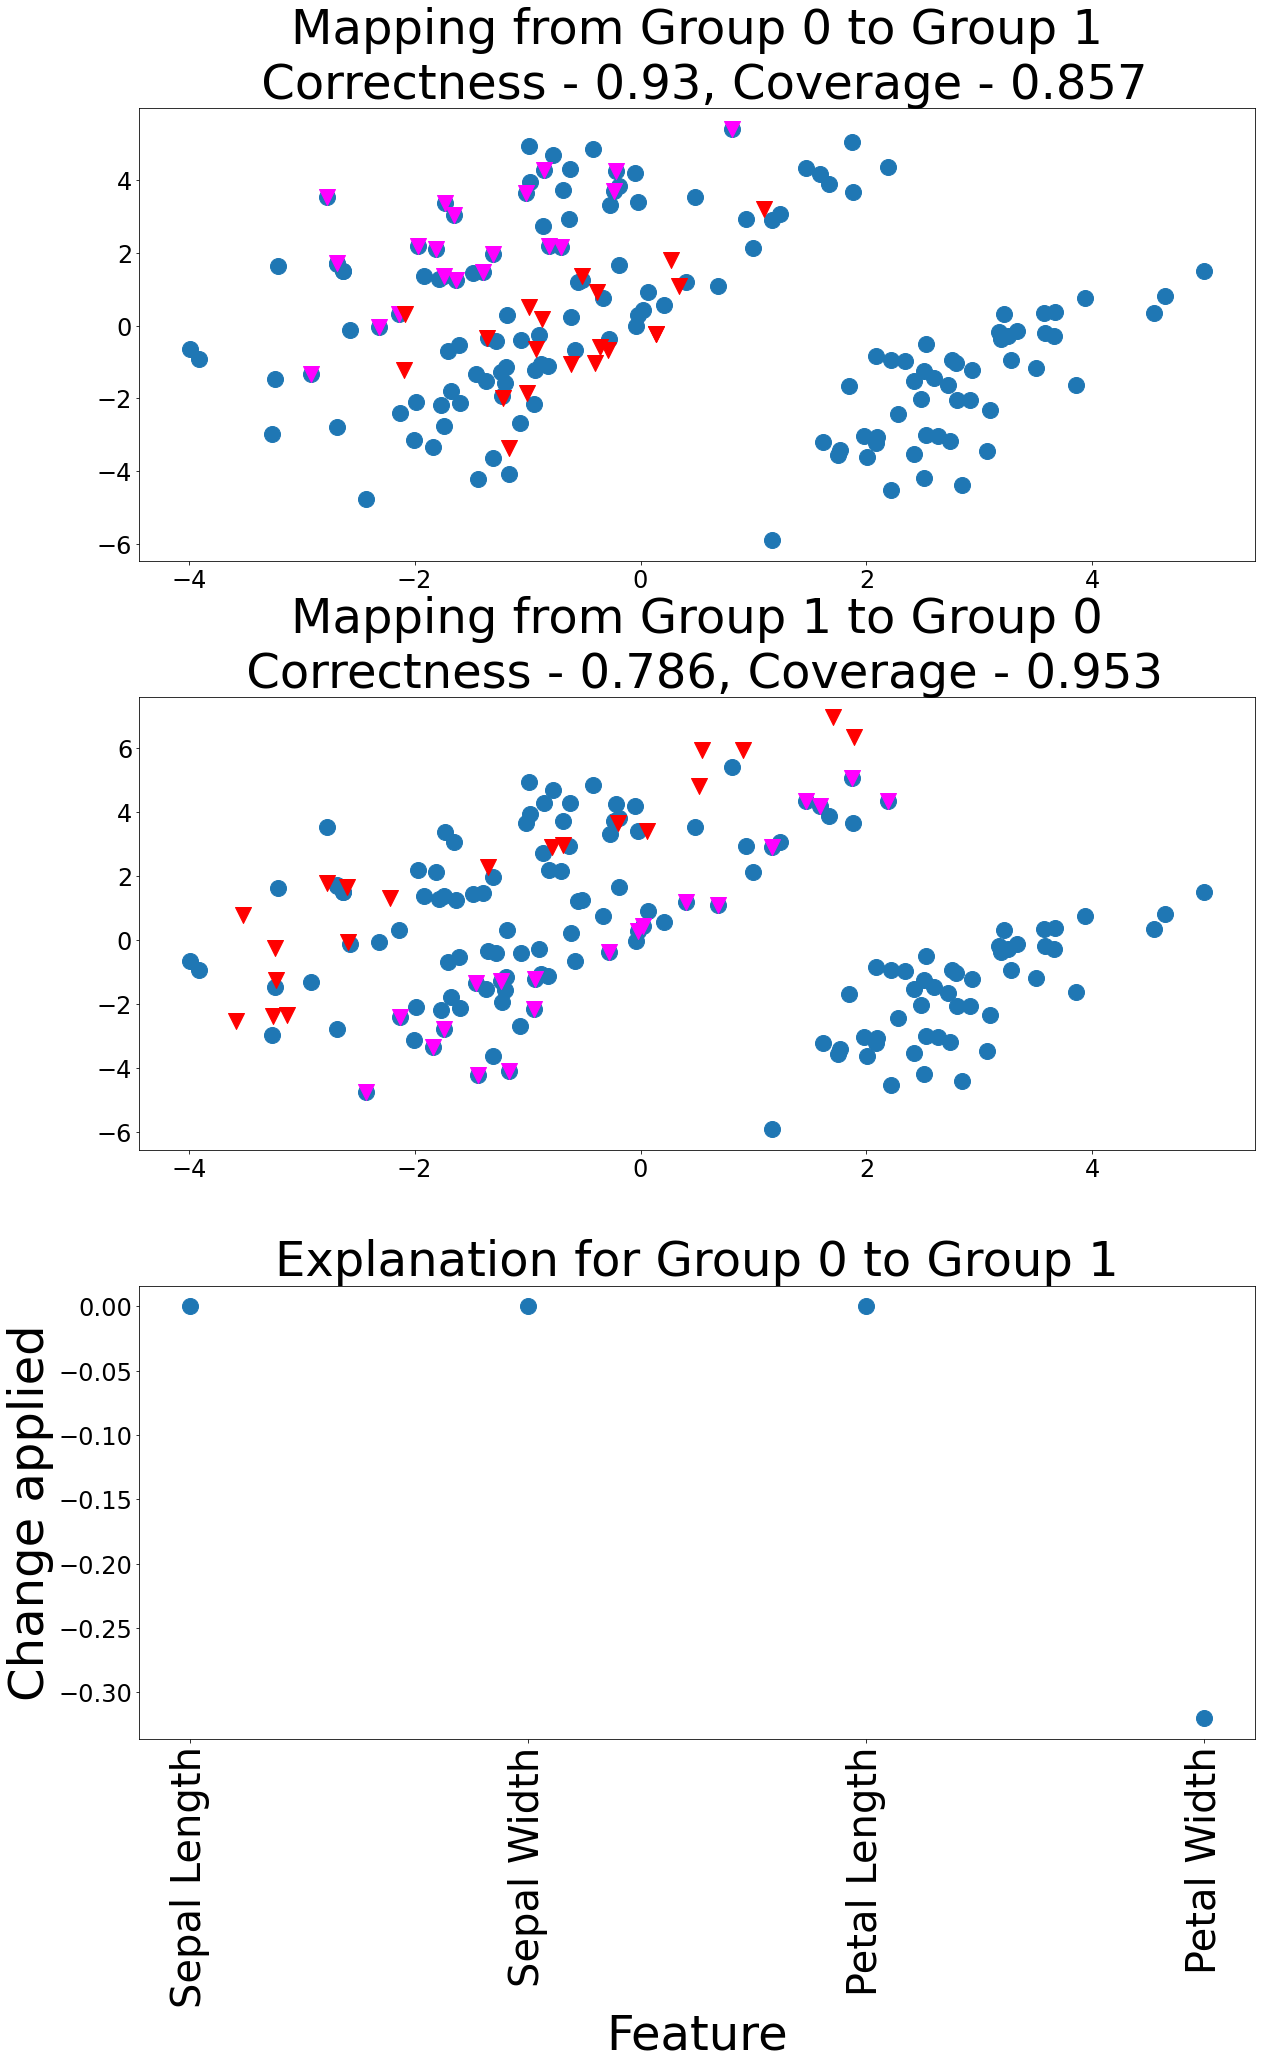

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


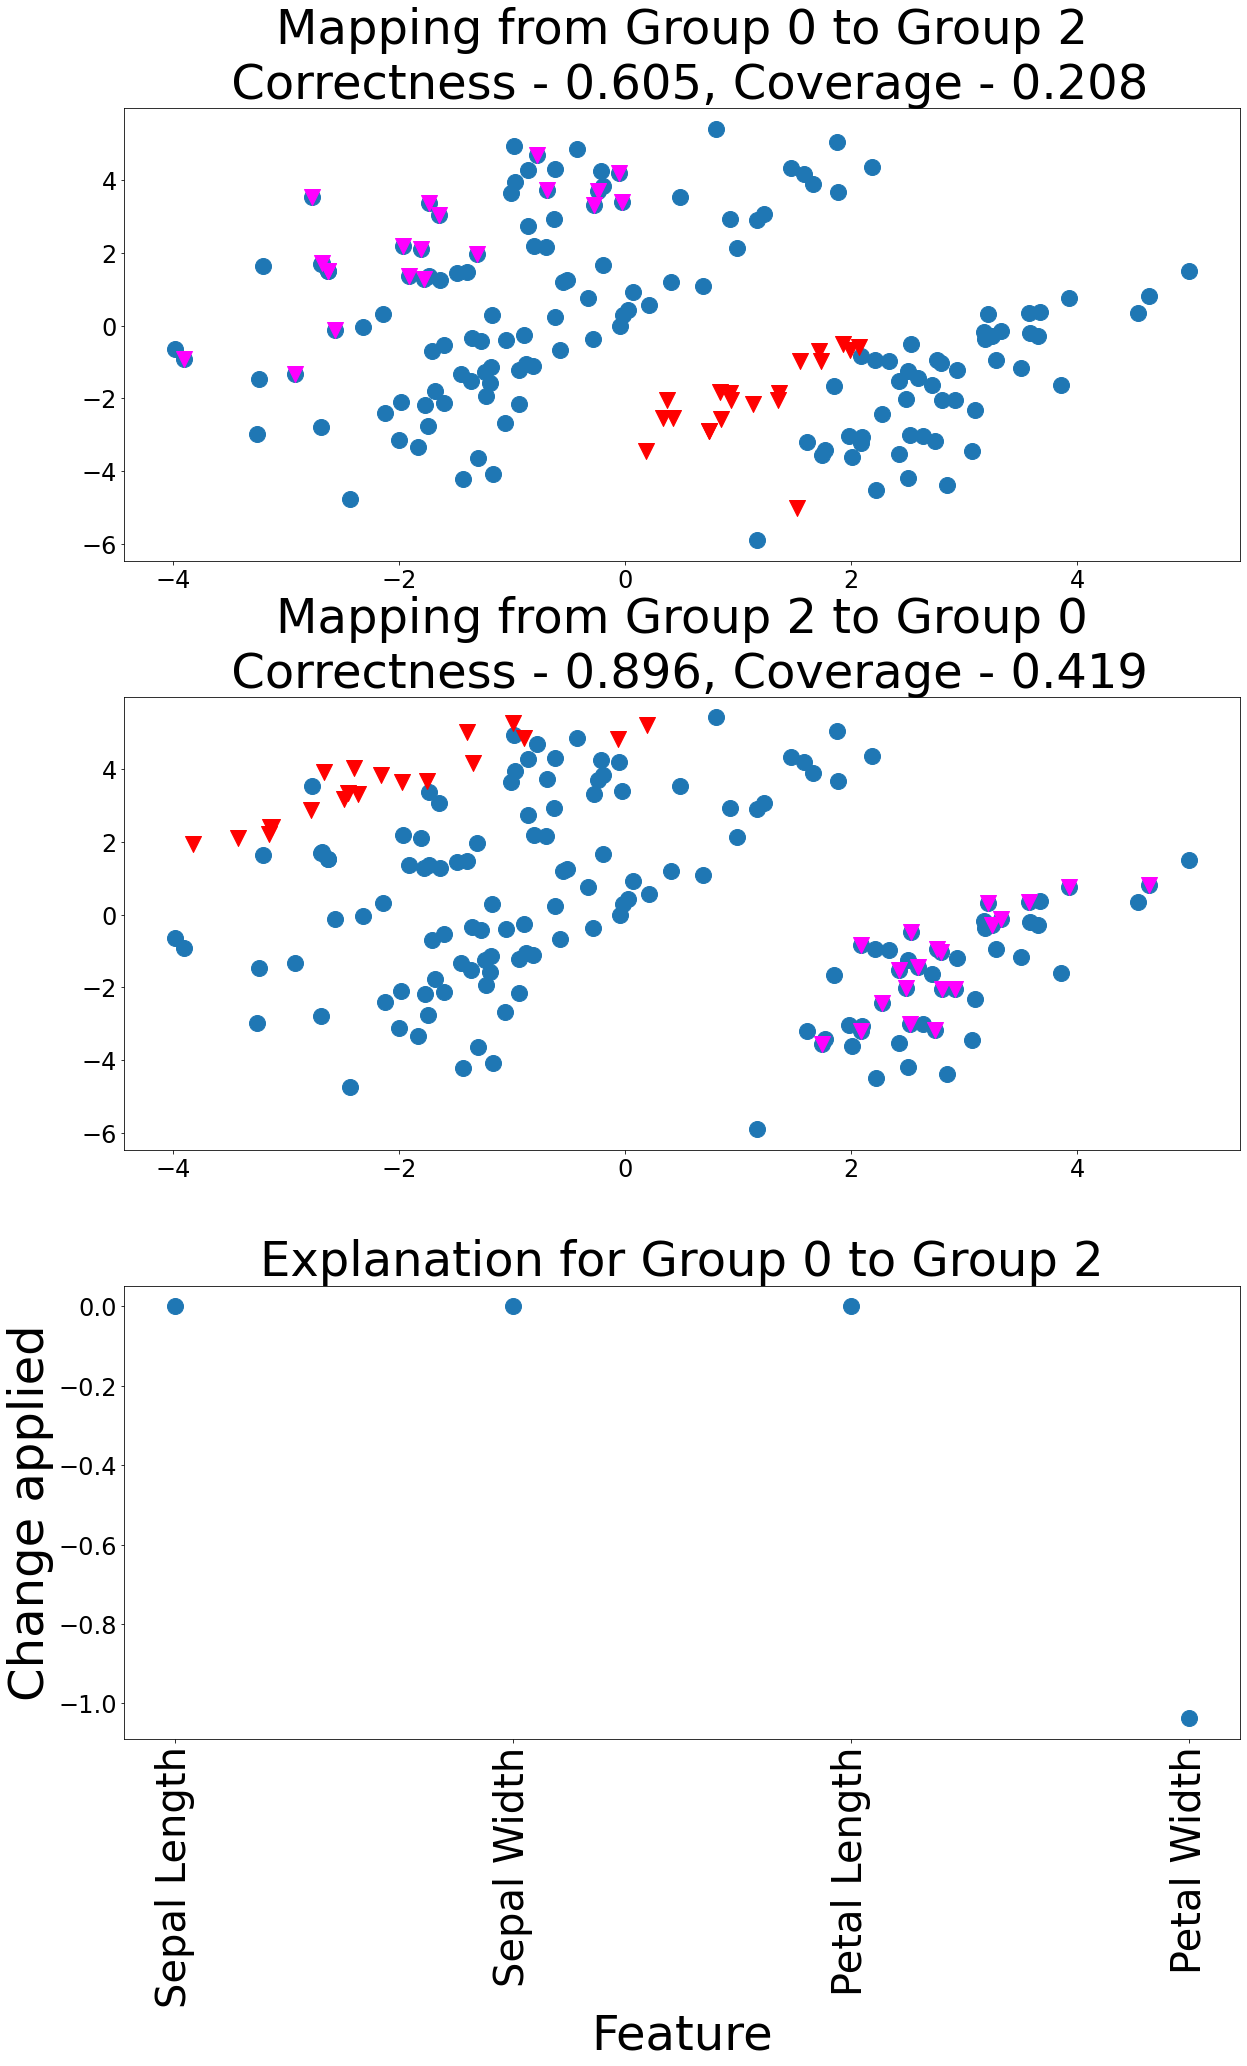

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


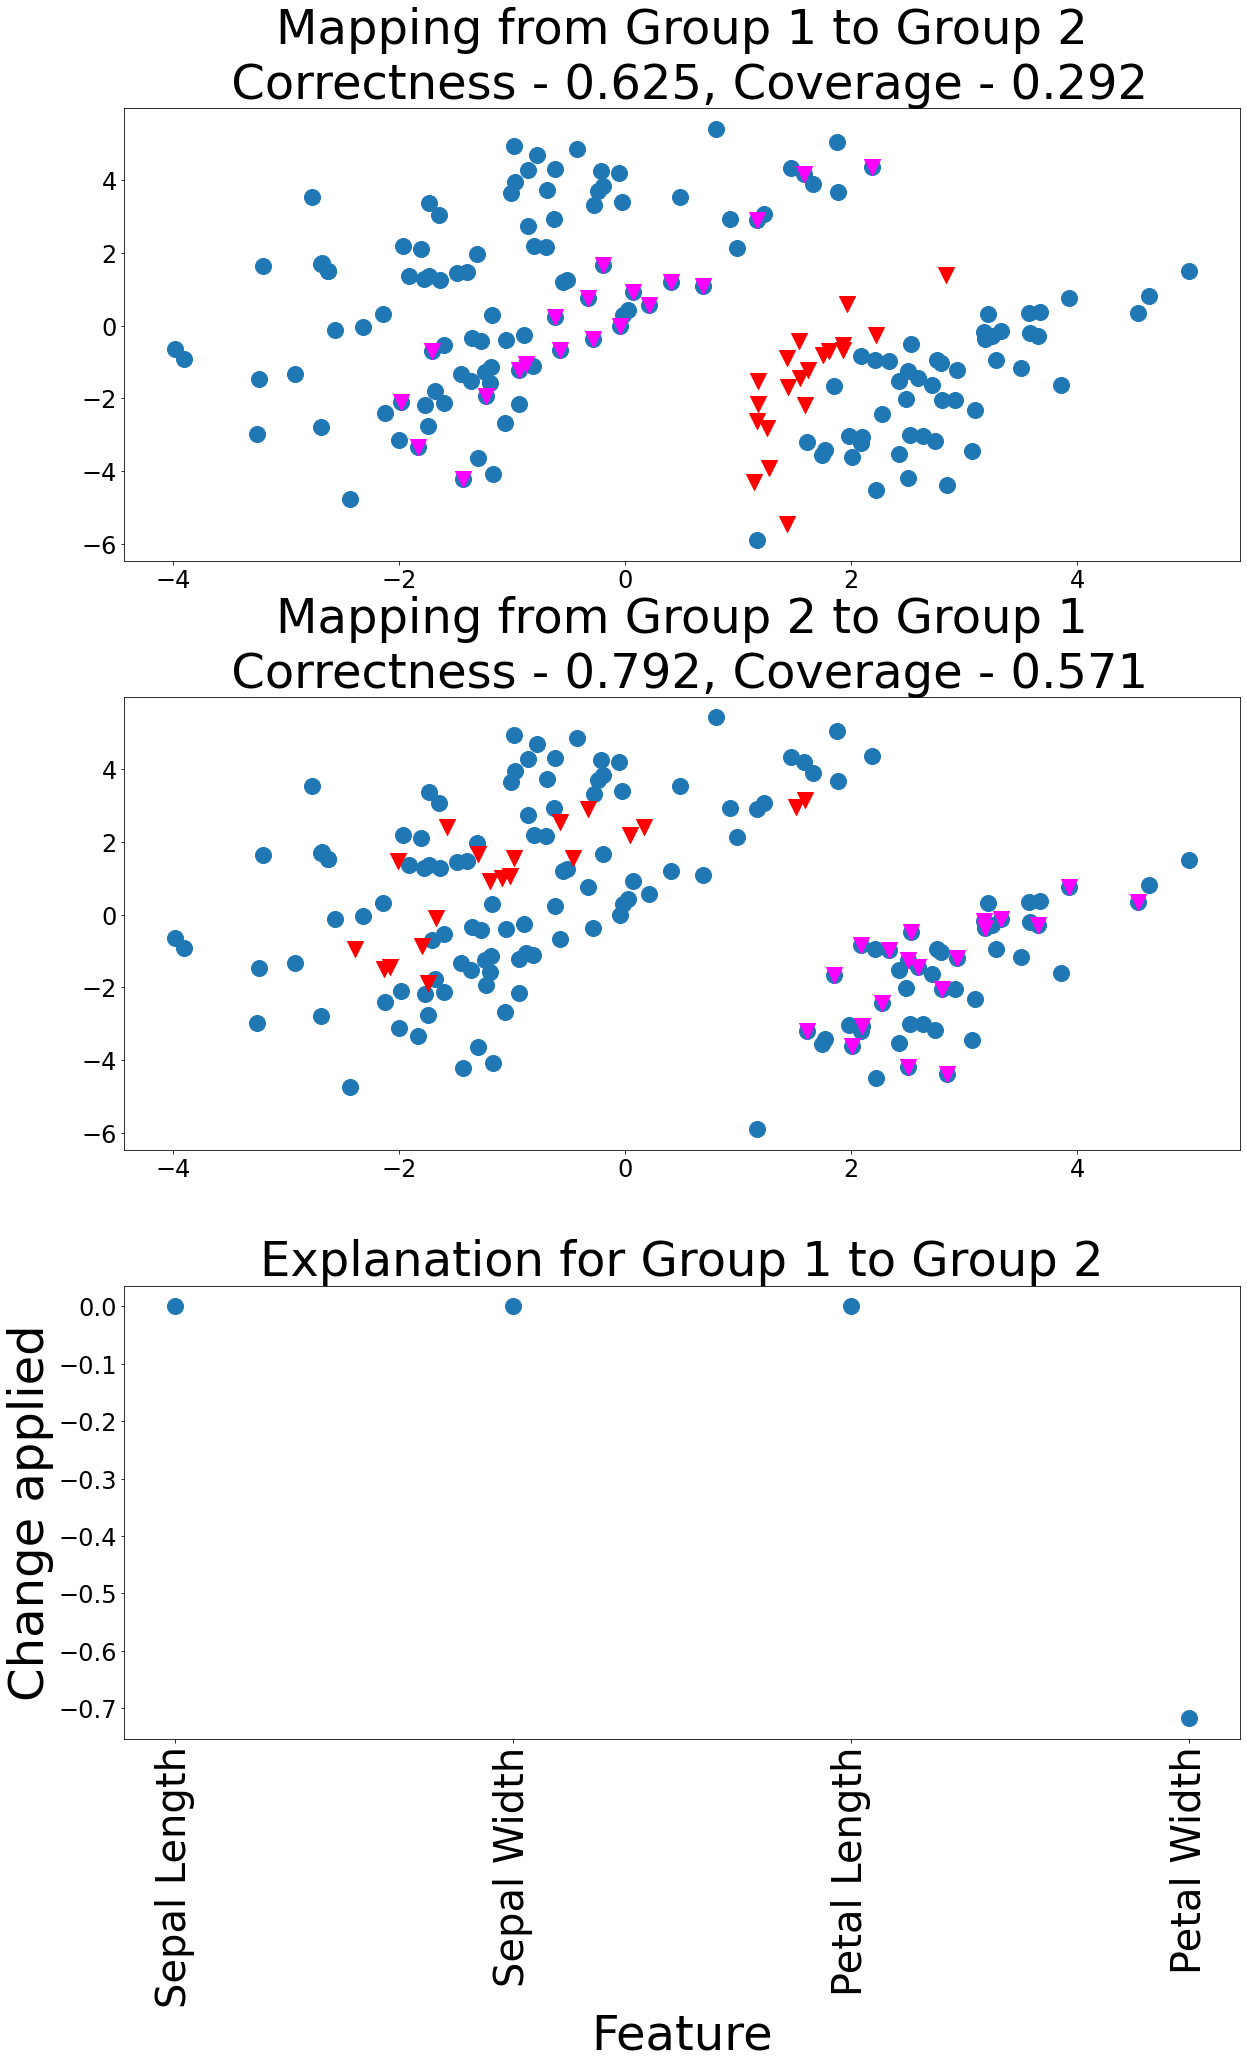

In [24]:
# Evaluate the explanations

deltas = np.load("../Reproduction/Iris-K/deltas" + str(k) + ".npy")

a, b = metrics(load_model, x, indices, deltas, epsilon, k = k)

plot_metrics(a, b, name = "iris-metrics.png")

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 0, 1, k = k, name = "iris-0to1.png", num_points = 20, feature_names = feature_names)

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 0, 2, k = k,  name = "iris-0to2.png", num_points = 20, feature_names = feature_names)

plot_explanation(load_model, x, data_rep, indices, deltas, a, b, 1, 2, k = k,  name = "iris-1to2.png", num_points = 20, feature_names = feature_names)


In [34]:
# Columns are:  K, TGT-correctness, TGT-coverage, DBM-correctness, DBM-coverage
K = range(1,num_clusters+1)
out = np.zeros((len(K), 4))

best_deltas = np.zeros((num_clusters - 1, input_dim))

# Evaluate TGTs
for c,k in enumerate(K):
  best_val = 0.0
  for lg in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
      for trial in range(3):

          deltas = explain(load_model, means, centers, learning_rate = 0.01, consecutive_steps = 5, lambda_global = lg)
          a, b = metrics(load_model, x, indices, deltas, epsilon, k = k) 

          val = np.mean(a)

          if val > best_val:
              best_deltas = deltas
              best_val = val
              out[c, 0] = best_val
              out[c, 1] = np.mean(b)
# Evaluate DBMs
exp_mean = np.zeros((num_clusters - 1, input_dim))
for i in range(num_clusters - 1):
    exp_mean[i, :] = means[i + 1] - means[0]

for c,k in enumerate(K):
    a, b = metrics(load_model, x, indices, exp_mean, epsilon, k = k)
    out[c, 2] = np.mean(a)
    out[c, 3] = np.mean(b)

print(out)

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring

In [107]:
def eval_classification(X, labels, deltas, dbms, k):

  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score

  num_clusters = 3
  tgt_features = [np.argpartition(deltas[i],-k)[-k:].tolist() for i in range(num_clusters - 1)]
  dbm_features = [np.argpartition(dbms[i],-k)[-k:].tolist() for i in range(num_clusters -1)]

  ##### TGT ######

  # train classifiers
  clfs = []
  for c, idxs in enumerate(tgt_features):
    kx = X[:,idxs]
    ky = (labels == c).astype(int)
    clf = LogisticRegression().fit(kx, ky)
    clfs.append(clf)

  # predict using one-vs-rest ensemble
  preds = []
  for i in range(x.shape[0]):
    probs = []
    for c in range(num_clusters-1):
      pred = clfs[c].predict_proba(x[i, tgt_features[c]].reshape(1, -1))
      probs.append(pred[:,1][0])
    preds.append(np.argmax(probs))

  tgt_acc = accuracy_score(labels, preds)
  
  ##### DBM ######
  clfs = []
  for c, idxs in enumerate(dbm_features):
    kx = X[:,idxs]
    ky = (labels == c).astype(int)
    clf = LogisticRegression().fit(kx, ky)
    clfs.append(clf)

  # predict using one-vs-rest ensemble
  preds = []
  for i in range(x.shape[0]):
    probs = []
    for c in range(num_clusters-1):
      pred = clfs[c].predict_proba(x[i, dbm_features[c]].reshape(1, -1))
      probs.append(pred[:,1][0])
    preds.append(np.argmax(probs))
  
  dbm_acc = accuracy_score(labels, preds)

  return [tgt_acc, dbm_acc]

In [127]:
for i,l in np.ndenumerate(labels):
  if l == -1: 
    labels[i[0]] = 0
    continue
  if l == 0: 
    labels[i[0]] = 0
    continue
  if l == 1: 
    labels[i[0]] = 1
    continue
  if l == 2: 
    labels[i[0]] = 2
    continue

In [128]:
np.unique(labels)

array([0., 1., 2.])

In [129]:
unique, counts = np.unique(labels, return_counts=True)

In [130]:
counts

array([45, 56, 48])

In [131]:
tgt_res = []
dbm_res = []
num_features = range(1,input_dim + 1)
for k in num_features:
  res = eval_classification(x, labels, best_deltas, exp_mean, k)
  tgt_res.append(res[0])
  dbm_res.append(res[1])

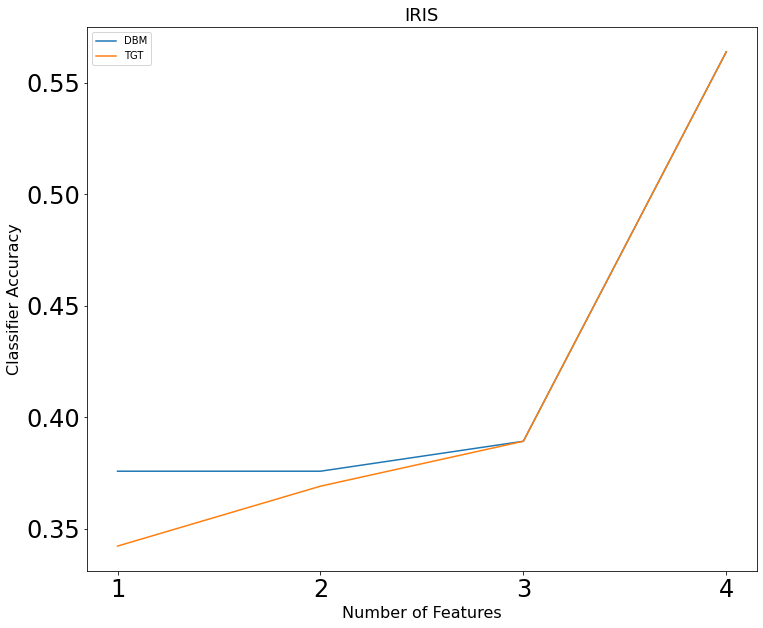

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(num_features, dbm_res, label='DBM')
plt.plot(num_features, tgt_res, label='TGT')
plt.xticks(num_features)
plt.title('IRIS',  fontsize=18)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Classifier Accuracy', fontsize=16)
plt.legend()
plt.show()

## Corrupted data

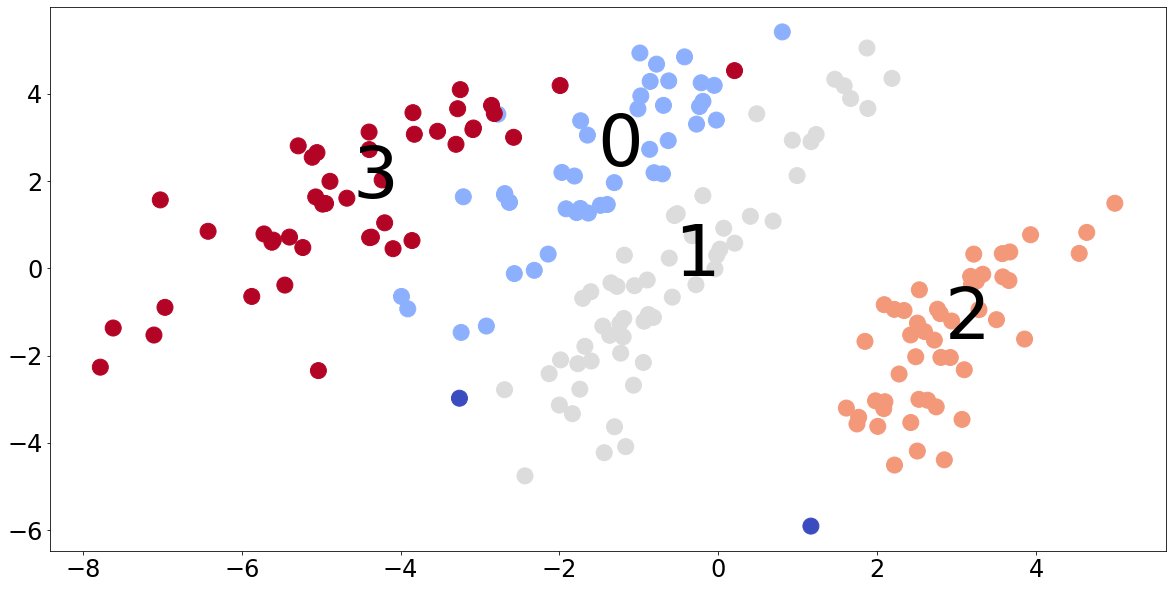

In [ ]:
# Let's "corrupt" one of the groups

corrupt = False
target_corrupted = 0

if corrupt:

    indices_corrupted = np.where(labels == target_corrupted)
    n_corrupted = len(indices_corrupted[0])

    x_corrupted = x[indices_corrupted]
    x_corrupted[:, 1] -= 0.4 + np.random.uniform(low = -0.1, high = 0.1, size = n_corrupted)

    print(x_corrupted[:, 1])

    x_full = np.vstack((x, x_corrupted))

    np.savetxt("../Reproduction/Data/X_corrupted.tsv", x_full, delimiter = "\t")

    labels_full = np.vstack((np.expand_dims(labels, 1), num_clusters * np.ones((n_corrupted,1))))

    np.savetxt("../Reproduction/Data/labels_corrupted.tsv", labels_full, delimiter = "\t")
else:
    x_full = np.loadtxt("../Reproduction/Iris/Data/X_corrupted.tsv", delimiter = "\t")
    labels_full = np.loadtxt("../Reproduction/Iris/Data/labels_corrupted.tsv", delimiter = "\t")    

# Compute the new representation
data_rep_full = sess.run(rep, feed_dict={X: x_full, D: np.zeros((1, input_dim))})

# Visualize the clusters in the learned representation
means_full, centers_full, indices_full = plot_groups(x_full, data_rep_full, num_clusters + 1, labels_full, name = "iris-rep-corrupted.png")



In [ ]:
# Compute the group explanations

run = False

if run:
    os.system("rm deltas_corrupted.npy")
    
    best_val = 0.0
    for lg in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
        for trial in range(5):

            deltas = explain(load_model, means_full, centers_full, learning_rate = 0.01, consecutive_steps = 5, lambda_global = lg)
            a, b = metrics(load_model, x_full, indices, deltas, epsilon, k = k) 

            val = np.mean(a)

            if val > best_val:
                best_val = val
                np.save("deltas_corrupted.npy", deltas)

            os.system("rm -rf explanation")

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


/content/ELDR/Code/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


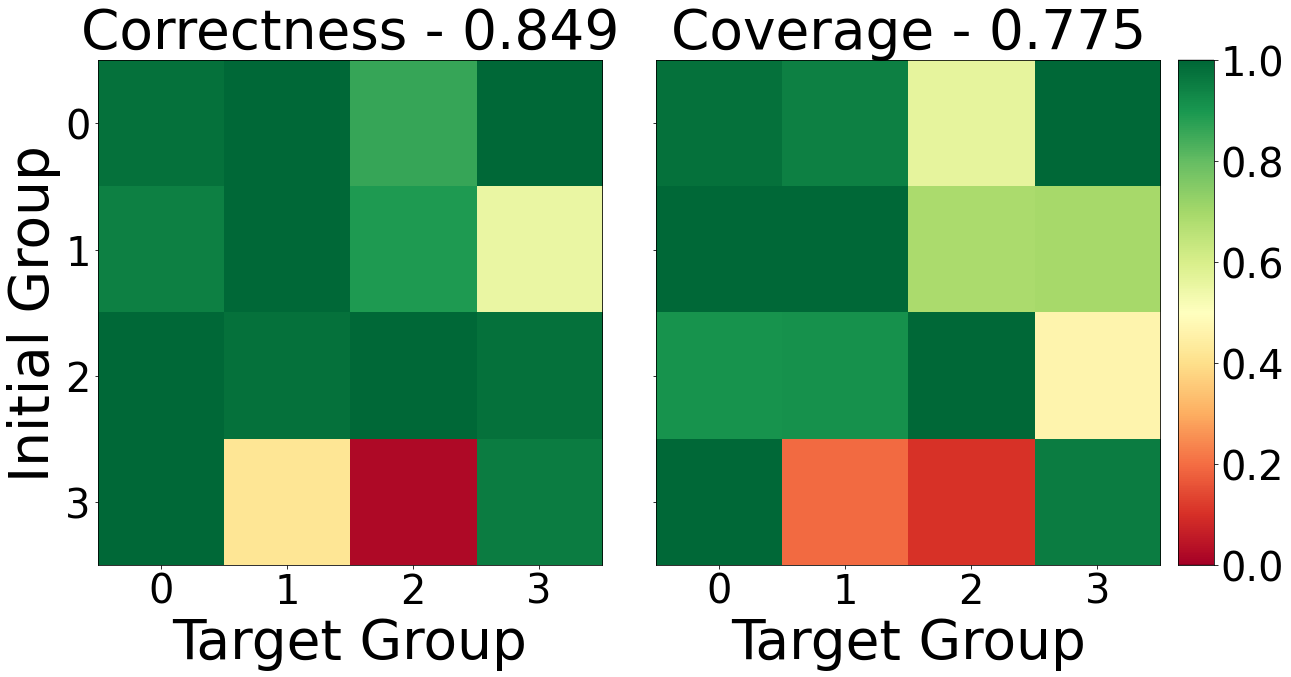

INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt
INFO:tensorflow:Restoring parameters from /content/ELDR/Iris/Model/model/perplexity_10_regularizer_0.001_batch_size_149_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt


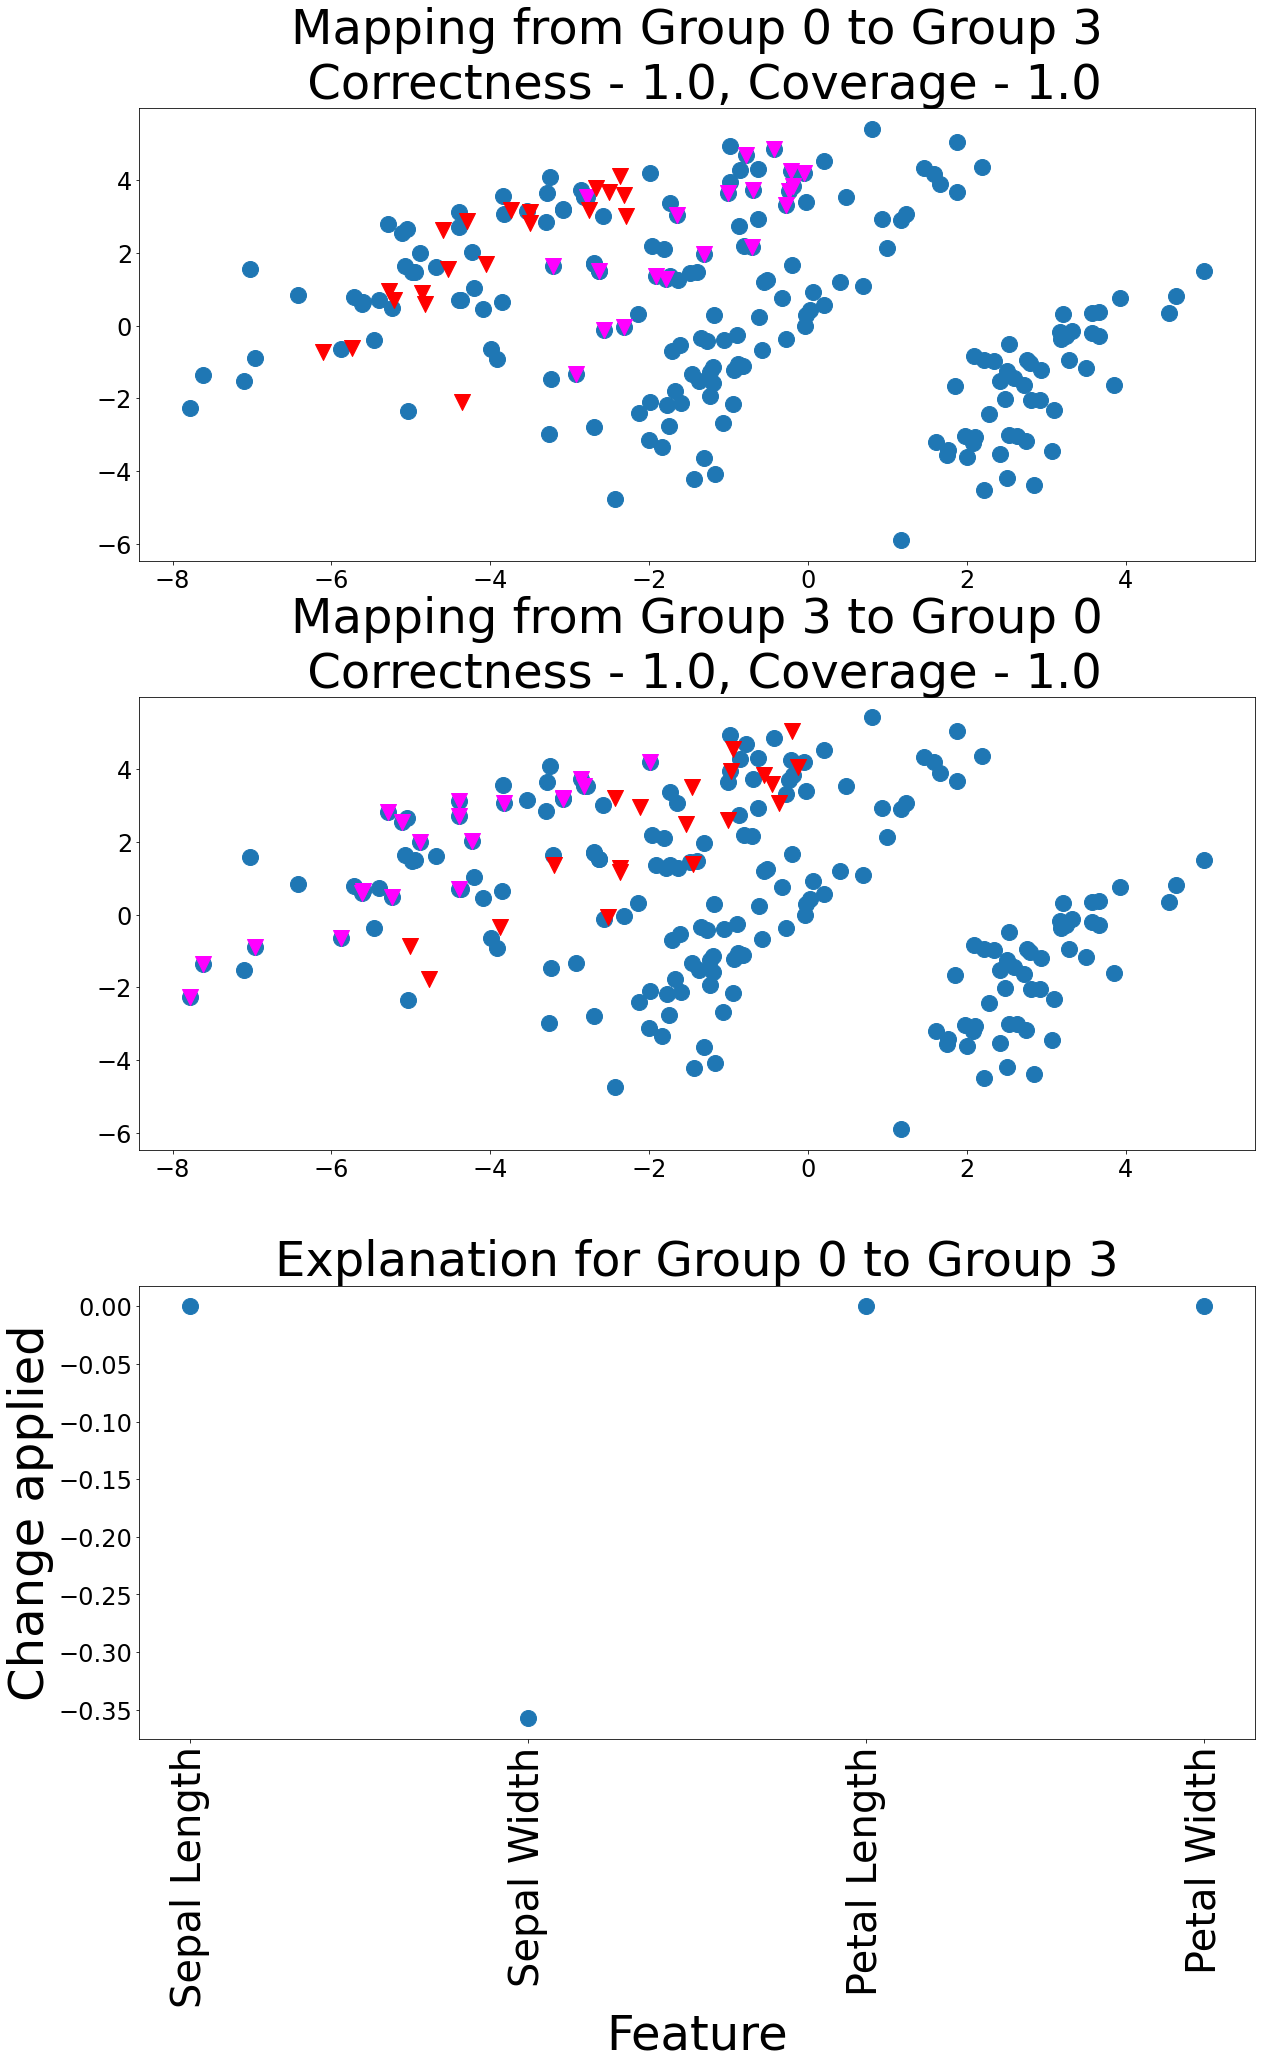

In [ ]:
# Evaluate the explanations

deltas = np.load("../Reproduction/Iris/deltas_corrupted.npy")

a, b = metrics(load_model, x_full, indices_full, deltas, epsilon, k = k)

plot_metrics(a, b, name = "iris-metrics-corrupted.png")

plot_explanation(load_model, x_full, data_rep_full, indices_full, deltas, a, b, target_corrupted, num_clusters, k = k, name = "iris-t2c.png", num_points = 20, feature_names = feature_names)


[[-0.02 -0.02 -0.03 -0.32]
 [ 0.06  0.11  0.05 -1.04]]
[[ 0.01  0.01 -0.01 -0.28]
 [-0.34  0.26 -0.08 -0.97]]


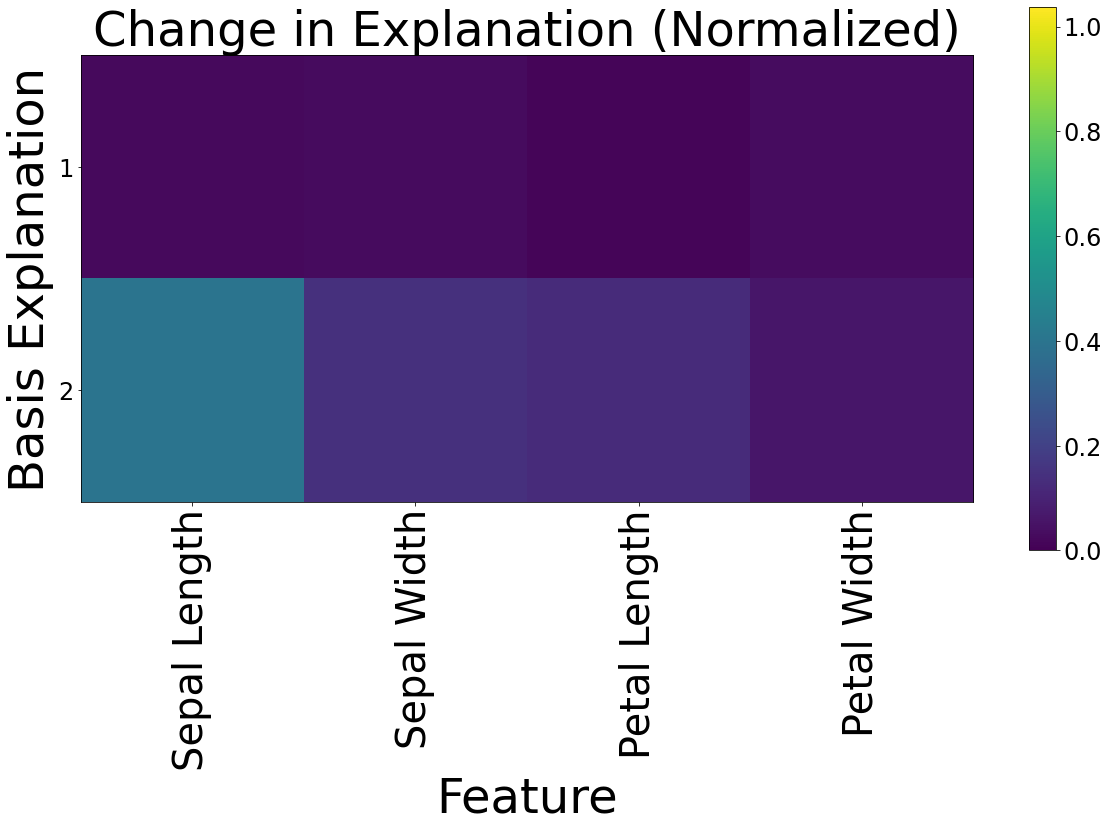

In [ ]:
# Evaluate how much the other explanations changed

deltas_original = np.load("../Reproduction/Iris-K/deltas" + str(k) + ".npy")

plot_change(deltas, deltas_original, "iris-corrupted-similarity.png", feature_names = feature_names)
